In [9]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [10]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt2 = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt2.append((point.latitude, point.longitude))

observations_array = np.array(qt2)
# print(observations_array)
qt2 = observations_array[73:150]

In [11]:
import folium
from gpxpy import parse

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = parse(gpx_file)

map_center2 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap2 = folium.Map(location=map_center2, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs2 = [(point.latitude, point.longitude) for point in segment.points[73:150]]  
        folium.PolyLine(lat_lon_pairs2, color="blue", weight=2.5, opacity=1).add_to(mymap2)

mymap2


In [12]:
import folium
from shapely.geometry import LineString
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)

all_points2 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points2.extend([(point.longitude, point.latitude) for point in segment.points[73:150]]) 

route_line2 = LineString(all_points2)
buffer_distance2 = 0.001  
route_buffer2 = route_line2.buffer(buffer_distance2)
map_center2 = route_line2.centroid.coords[0][::-1] 
mymap2 = folium.Map(location=map_center2, zoom_start=14)
lat_lon_pairs2 = [(point[1], point[0]) for point in route_line2.coords]
folium.PolyLine(lat_lon_pairs2, color="blue", weight=2.5, opacity=1).add_to(mymap2)
route_buffer_geojson2 = route_buffer2.__geo_interface__
folium.GeoJson(route_buffer_geojson2, name='geofence').add_to(mymap2)
mymap2


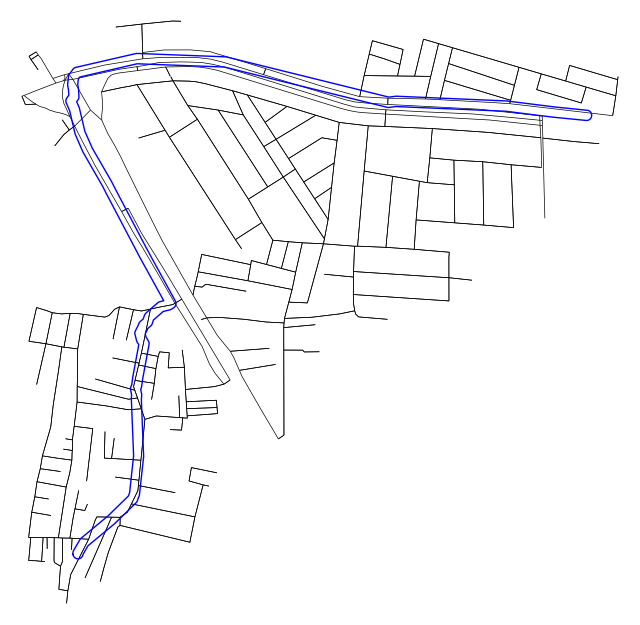

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon2 = route_buffer2.convex_hull
G2 = ox.graph_from_polygon(route_polygon2, network_type='drive')
fig2, ax2 = ox.plot_graph(G2, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer2 = route_line2.buffer(0.0001)  
ax2.plot(*route_line_buffer2.exterior.xy, color='blue', linewidth=1)
ax2.plot(*route_line_buffer2.exterior.xy[73:150], color='blue', linewidth=1)
plt.show()


In [7]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon2 = route_buffer2.convex_hull
G2 = ox.graph_from_polygon(route_polygon2, network_type='drive')
states2 = np.array([(data2['y'], data2['x']) for node, data2 in G2.nodes(data=True)])
print("Number of nodes:", len(states2))
print("Node coordinates:")
for node in states2:
    print(node)

Number of nodes: 281
Node coordinates:
[12.9176822 77.6243834]
[12.9147868 77.6240948]
[12.9160375 77.6334544]
[12.9145922 77.6323754]
[12.9175235 77.6248374]
[12.9166108 77.6292106]
[12.9163717 77.6291947]
[12.9141678 77.6269691]
[12.9171824 77.6242671]
[12.9140012 77.6263477]
[12.9141783 77.6262246]
[12.914509  77.6267505]
[12.9161622 77.6249126]
[12.9165111 77.625469 ]
[12.9172556 77.6249821]
[12.9164496 77.6282878]
[12.9163831 77.6288648]
[12.9170632 77.6261679]
[12.9140978 77.6279751]
[12.9169816 77.6264616]
[12.9145698 77.6280676]
[12.9155462 77.6274158]
[12.9153907 77.627176 ]
[12.9149618 77.626482 ]
[12.9167763 77.6252775]
[12.9165947 77.6263805]
[12.9166892 77.6258808]
[12.9151999 77.6268673]
[12.9159809 77.6267886]
[12.9161225 77.6270328]
[12.91645   77.6268151]
[12.9167596 77.6272497]
[12.9157491 77.627281 ]
[12.9161026 77.6282458]
[12.9140523 77.6286535]
[12.91344   77.6304686]
[12.9135605 77.6285734]
[12.9161458 77.6323351]
[12.9160778 77.632965 ]
[12.9133923 77.6309261]
[

In [14]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances2 = []
for i in range(len(qt2) - 1):
    x1, y1 = qt2[i]
    x2, y2 = qt2[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances2.append(distance)
TRANS2 = np.zeros((len(states2), len(states2), len(qt2)-1))

beta = 0.95  

n2 = len(states2)
for k in range(len(qt2)-1):
    for i in range(n2):
        for j in range(n2):
            xtemp2 = np.linalg.norm(states2[i] - states2[j])
            dij2 = abs(xtemp2 - pairwise_distances2[k])
            TRANS2[i, j, k] = (1 / beta) * exp(-dij2 / beta)
        TRANS2[i, :, k] = TRANS2[i, :, k] / np.sum(TRANS2[i, :, k])

sigztemp2 = []
for i in range(len(qt2)):
    for j in range(len(states2)):
        sigztemp2.append(np.linalg.norm(qt2[i] - states2[j]))
sigz2 = 1.4 * np.median(sigztemp2)

EMIS2 = np.zeros((len(states2), len(qt2)))
for i in range(len(qt2)):
    for j in range(len(states2)):
        EMIS2[j, i] = (1 / (sqrt(2 * pi) * sigz2)) * exp(-0.5 * ((np.linalg.norm(qt2[i] - states2[j])) / sigz2) ** 2)

# seq = [1, 2, 3, 4]
seq2 = np.arange(1, len(qt2)+1)

PRIOR2 = np.array([(1 / len(states2))] * len(states2))
# PRIOR[358] = 0.7

T2 = len(seq2)  # Number of observations
n2 = EMIS2.shape[0]  # Number of states

score2 = np.zeros((n2, T2))
pred2 = np.zeros((n2, T2))

for i in range(n2):
    score2[i, 0] = PRIOR2[i] * EMIS2[i, seq2[0] - 1]

for t in range(1, T2):
    for j in range(n2):
        tscore2 = np.zeros(n2)
        for k in range(n2):
            tscore2[k] = score2[k, t - 1] * TRANS2[k, j, t - 1] * EMIS2[j, seq2[t] - 1]
        score2[j, t] = np.max(tscore2)
        id2 = np.where(tscore2 == np.max(tscore2))[0][0]
        pred2[j, t] = id2

IT2 = np.zeros(T2, dtype=int)
IT2[-1] = np.argmax(score2[:, -1])

for t in range(T2 - 1, 0, -1):
    IT2[t - 1] = int(pred2[IT2[t], t])

print(IT2)

[247 247  97 117 129 129 177 208 208 208 208 207 207 207 207 207 198 165
 165 165 165 204 204 204 205 205 205 205 205 205  64  64  64  64 191 191
   1  94  94 231 231 231 132 108 108 134 265 265 265 265 265 265 265 265
 265 265 265 265 265 265 265 265 265 265 265 265 133 265   0  17 107 106
  82  92 276 277  38]


In [15]:
coordinates_IT2 = states2[IT2]
print(coordinates_IT2)

[[12.908169  77.6229669]
 [12.908169  77.6229669]
 [12.9083736 77.6233073]
 [12.9088016 77.6237639]
 [12.9090586 77.624158 ]
 [12.9090586 77.624158 ]
 [12.9099046 77.6243457]
 [12.9111114 77.6242781]
 [12.9111114 77.6242781]
 [12.9111114 77.6242781]
 [12.9111114 77.6242781]
 [12.9112594 77.6242253]
 [12.9112594 77.6242253]
 [12.9112594 77.6242253]
 [12.9112594 77.6242253]
 [12.9112594 77.6242253]
 [12.911451  77.6242287]
 [12.9119789 77.6243558]
 [12.9119789 77.6243558]
 [12.9119789 77.6243558]
 [12.9119789 77.6243558]
 [12.9122295 77.6240556]
 [12.9122295 77.6240556]
 [12.9122295 77.6240556]
 [12.9128209 77.6241988]
 [12.9128209 77.6241988]
 [12.9128209 77.6241988]
 [12.9128209 77.6241988]
 [12.9128209 77.6241988]
 [12.9128209 77.6241988]
 [12.9128328 77.6245364]
 [12.9128328 77.6245364]
 [12.9128328 77.6245364]
 [12.9128328 77.6245364]
 [12.9129435 77.6250232]
 [12.9129435 77.6250232]
 [12.9147868 77.6240948]
 [12.9147233 77.6239622]
 [12.9147233 77.6239622]
 [12.9163027 77.6229224]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


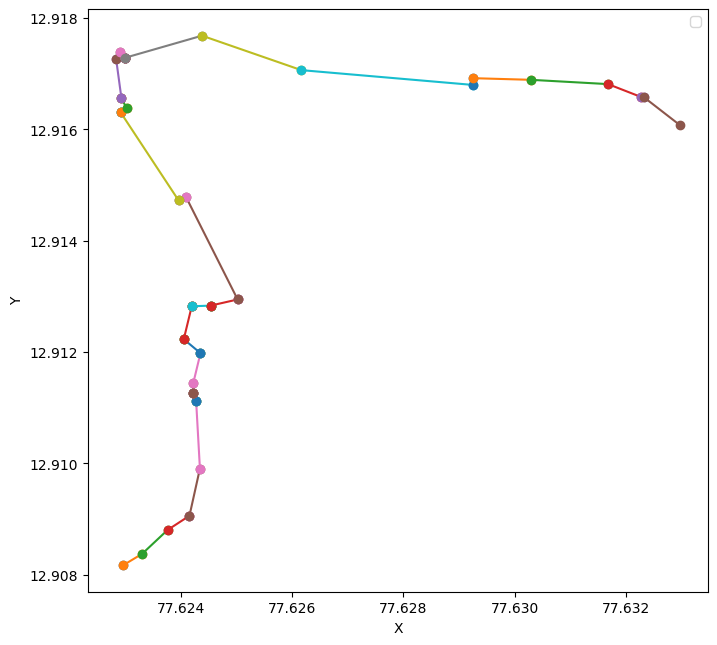

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()  # Show legend to differentiate between paths
    plt.show()

G2 = nx.Graph()
for i in range(len(IT2) - 1):
    G2.add_edge(IT2[i], IT2[i + 1])
shortest_paths = [nx.shortest_path(G2, IT2[i], IT2[i + 1]) for i in range(len(IT2) - 1)]

# Display the shortest paths
display_shortest_paths(shortest_paths, states2)


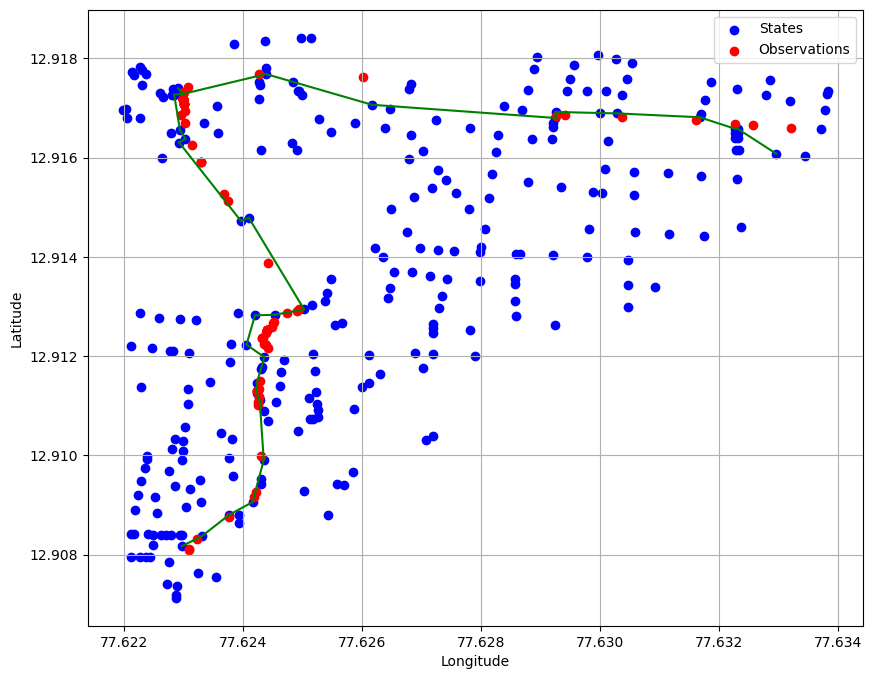

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(states2[:, 1], states2[:, 0], color='blue', label='States')
plt.scatter(qt2[:, 1], qt2[:, 0], color='red', label='Observations')
for i in range(len(IT2) - 1 - 0):
    start_point = states2[IT2[i]]
    end_point = states2[IT2[i + 1]]
    plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Path from Viterbi Algorithm on Map')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


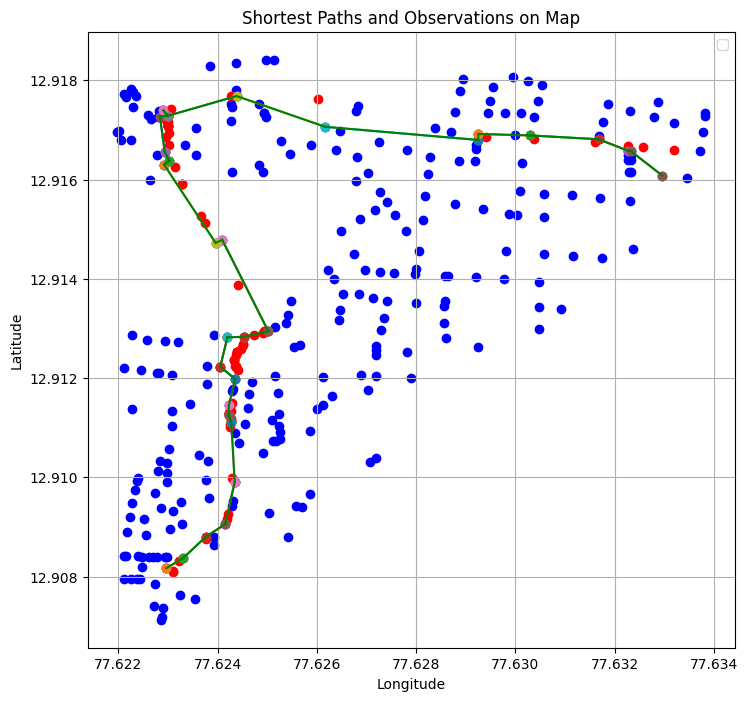

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(10, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label

    plt.scatter(states[:, 1], states[:, 0], color='blue')
    plt.scatter(qt2[:, 1], qt2[:, 0], color='red')
    for i in range(len(IT2) - 1):
        start_point = states[IT2[i]]
        end_point = states[IT2[i + 1]]
        ax.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')

    ax.set_aspect('equal')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Shortest Paths and Observations on Map')
    ax.legend()  # Show legend to differentiate between paths
    plt.grid(True)
    plt.show()

G2 = nx.Graph()
for i in range(len(IT2) - 1):
    G2.add_edge(IT2[i], IT2[i + 1])
shortest_paths = [nx.shortest_path(G2, IT2[i], IT2[i + 1]) for i in range(len(IT2) - 1)]

# Display the shortest paths along with states and observations
display_shortest_paths(shortest_paths, states2)
